# Imported Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model #GARCH Models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import math
from statistics import NormalDist
from scipy.stats import t
from datetime import datetime
from scipy.stats import shapiro #Shapiro Test
from scipy import stats #t-test
import statsmodels.api as sm #Ljung-Box Test
from scipy.stats import chi2

# Data

In [ ]:
start_date = '2006-01-01' #yyyy-mm-dd
end_date = '2021-01-01'


#Philippines
PH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/PSEi.csv')
PH['Date'] = pd.to_datetime(PH['Date'])
PH = PH.rename(columns={'Price': 'Close'})
PH = PH.replace(',','', regex=True)
PH['Close'] = PH['Close'].astype(float, errors = 'raise')
mask = (PH['Date'] >= start_date) & (PH['Date'] <= end_date)
PH = PH.loc[mask]
PH = PH.set_index('Date')
PH = PH.sort_index(axis=0, ascending = False)

#Malaysia
MY = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/%5EKLSE.csv')
MY['Date'] = pd.to_datetime(MY['Date'])
MY = MY.rename(columns={'Price': 'Close'})
MY = MY.replace(',','', regex=True)
MY['Close'] = MY['Close'].astype(float, errors = 'raise')
mask = (MY['Date'] >= start_date) & (MY['Date'] <= end_date)
MY = MY.loc[mask]
MY = MY.set_index('Date')
MY = MY.sort_index(axis=0, ascending = False)

#Signapore
SG = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/STI.csv')
SG['Date'] = pd.to_datetime(SG['Date'])
SG = SG.replace(',','', regex=True)
SG['Close'] = SG['Close'].astype(float, errors = 'raise')
mask = (SG['Date'] >= start_date) & (SG['Date'] <= end_date)
SG = SG.loc[mask]
SG= SG.set_index('Date')
SG = SG.sort_index(axis=0, ascending = False)

#Thailand
TH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/SETi.csv')
TH['Date'] = pd.to_datetime(TH['Date'])
TH = TH.rename(columns={'Price': 'Close'})
TH = TH.replace(',','', regex=True)
TH['Close'] = TH['Close'].astype(float, errors = 'raise')
mask = (TH['Date'] >= start_date) & (TH['Date'] <= end_date)
TH = TH.loc[mask]
TH= TH.set_index('Date')
TH = TH.sort_index(axis=0, ascending = False)

#Vietnam
VT = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/HNX.csv')
VT['Date'] = pd.to_datetime(VT['Date'])
VT = VT.rename(columns={'Price': 'Close'})
VT = VT.replace(',','', regex=True)
VT['Close'] = VT['Close'].astype(float, errors = 'raise')
mask = (VT['Date'] >= start_date) & (VT['Date'] <= end_date)
VT = VT.loc[mask]
VT= VT.set_index('Date')
VT = VT.sort_index(axis=0, ascending = False)

# Logarithmic Returns

In [ ]:
# Logarithmic Returns

def get_returns(df,d):
    '''
    The function obtains the log returns of the asset shifted d days
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    d : int
        The dth day being forecast
        (Assumed to be 1 for most cases)
        
    RETURNS
    -------
    df : pandas.DataFrame
        The data frame returns an updated data frame containing the
        'Returns' column
    '''
    df['Previous'] = df['Close'].shift(-d)
    df['Returns'] = np.log(df['Close']/df['Previous'])*100
    display(df)
    return df

PH = get_returns(PH, 1)
MY = get_returns(MY, 1)
SG = get_returns(SG, 1)
TH = get_returns(TH, 1)
VT = get_returns(VT, 1)

# Visualization of the Returns

In [ ]:
# Visualization of the Returns

plt.figure(figsize=(10,4))
plt.plot(PH['Returns'])
plt.ylabel('Log Returns')
plt.title('PH (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(MY['Returns'])
plt.ylabel('Log Returns')
plt.title('MY (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(SG['Returns'])
plt.ylabel('Log Returns')
plt.title('SG (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(TH['Returns'])
plt.ylabel('Log Returns')
plt.title('TH (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(VT['Returns'])
plt.ylabel('Log Returns')
plt.title('VT (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

# ACF

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


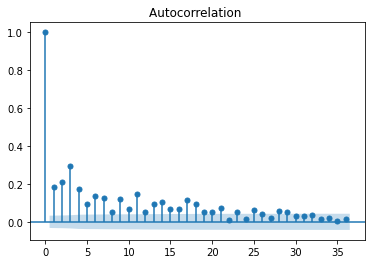

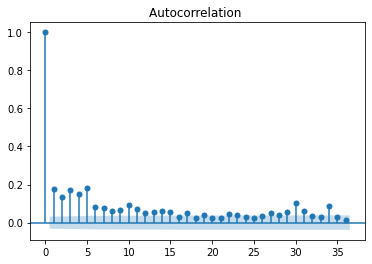

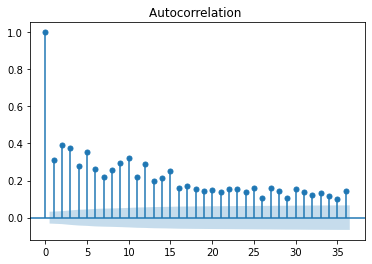

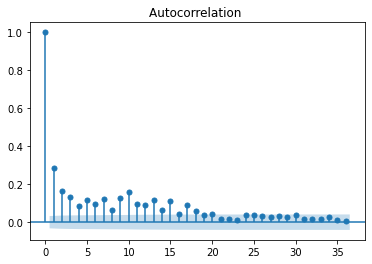

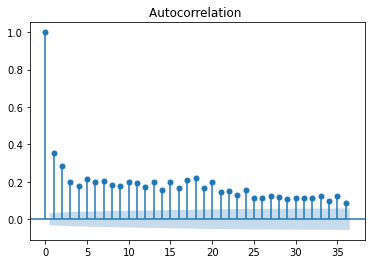

In [4]:
#Creating an ACF
def stock_ACF(df):
    return plot_acf(df['Returns'], lags = None, alpha = 0.05, title = 'Autocorrelation ', zero = True)

# PSEI_PS_ACF = stock_ACF(PSEI_PS)
# print(PSEI_PS_ACF)

print(stock_ACF(PH))
print(stock_ACF(MY))
print(stock_ACF(SG))
print(stock_ACF(TH))
print(stock_ACF(VT))

# PACF

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


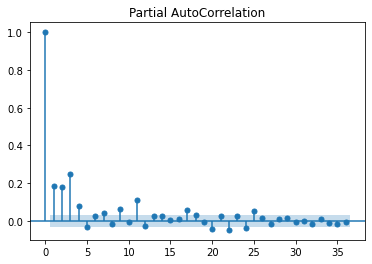

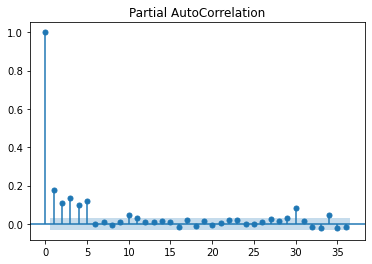

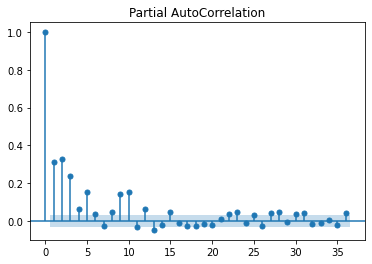

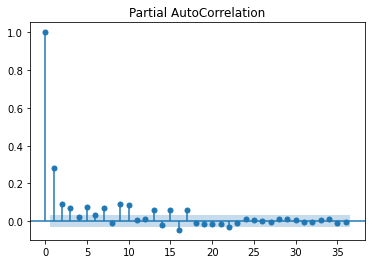

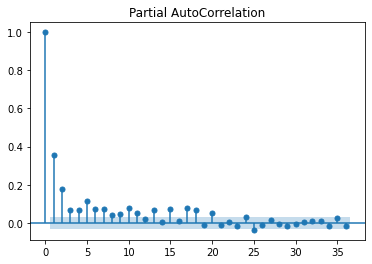

In [5]:
#Creating a PACF
def stock_PACF(df):
    return plot_pacf(df['Returns'], lags = None, alpha = 0.05, method = None,title = 'Partial AutoCorrelation',zero = True)

# PSEI_PS_PACF = stock_PACF(PSEI_PS)
# print(PSEI_PS_PACF)
print(stock_PACF(PH))
print(stock_PACF(MY))
print(stock_PACF(SG))
print(stock_PACF(TH))
print(stock_PACF(VT))

# Dump Code

In [30]:
# PH['Returns'][1:]

In [31]:
# PSEI_PS.index.inferred_type == "datetime64"
# PSEI_PS.index = pd.to_datetime(PSEI_PS.index)
# plt.figure(figsize=(10,5))
# plt.plot(PSEI_PS['Returns'])
# plt.ylabel('Log Returns', fontsize=16)
# plt.title('PSEI.PS Returns', fontsize=20)


In [32]:
# def residuals_function(df, d = 1):
#     mu_lst = []
#     df = df.reset_index()
#     for i in range(len(df['Returns'])-d):
#         mu = np.nansum(df['Returns'].iloc[i:])/len(df['Returns'].iloc[i:])
#         mu_lst.append(mu)
#     mu_df= pd.DataFrame(mu_lst, columns = ['Mu'])
#     mu_df = mu_df.iloc[:-d]
#     df = pd.merge(df, mu_df, left_index = True, right_index = True)
#     df['Residuals'] = df['Returns'] - df['Mu']
#     display(df)
#     return df
# PSEI_PS = residuals_function(PSEI_PS, d = 1)


In [16]:
# #Absolute Returns

# test_size = 365

# #Philippines
# plt.figure(figsize=(10,4))
# plt.plot(abs(PH['Returns'][:test_size]*100))
# plt.plot(-PH_rw_df)
# plt.plot(PH_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

# #Malaysia
# plt.figure(figsize=(10,4))
# plt.plot(abs(MY['Returns'][:test_size]*100))
# plt.plot(-MY_rw_df)
# plt.plot(MY_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

# #Singapore
# plt.figure(figsize=(10,4))
# plt.plot(abs(SG['Returns'][:test_size]*100))
# plt.plot(-SG_rw_df)
# plt.plot(SG_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

# #Thailand
# plt.figure(figsize=(10,4))
# plt.plot(abs(TH['Returns'][:test_size]*100))
# plt.plot(-TH_rw_df)
# plt.plot(TH_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

# #Vietnam
# plt.figure(figsize=(10,4))
# plt.plot(abs(VT['Returns'][:test_size]*100))
# plt.plot(-VT_rw_df)
# plt.plot(VT_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

In [33]:
# PSEI_PS = PSEI_PS.set_index('Date')
# plt.plot(PSEI_PS['Residuals'])
# plt.ylabel('Log Return', fontsize=16)
# plt.title('PSEI.PS Residuals', fontsize=20)

In [34]:
# df = PSEI_PS_resid*100 
# test_size =247
# d = 1 

# sigma_lst = []
# for i in range(len(df)-test_size):
#     temp_df = df[-(test_size+i):-(i+1)]
#     model = arch_model(temp_df, p=1, q=2, rescale=False)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=d, reindex = False).variance
#     sigma_lst.append(np.sqrt(pred.values[0,0]))
# sigma_lst = sigma_lst[::-1]
# sigma_lst*PSEI_PS_params[0]

In [35]:
# a = NormalDist().inv_cdf(1-0.05)
# type(a)

In [36]:
# a*np.array(sigma_lst) +PSEI_PS_mean.iloc[:-247]*100

In [37]:
# test_size = 971
# alpha = 0.05

# PH_1 = PH[::-1]
# returns = PH_1['Returns']
# sigma_lst = []
# date_df = PH_1.iloc[:test_size]
# date_df = date_df.reset_index()
# date_df = date_df.filter(['Date'])
# for i in range(test_size):
#     df = PH_1['Returns'][:-test_size+i]
#     model = arch_model(df, p = 1, q = 1, rescale = False)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=1, reindex = False)
#     sigma_lst.append(np.sqrt(pred.variance.values[-1,:][0]))
# sigma_df = pd.Series(sigma_lst, index=returns.index[-test_size:])
# VaR_df = -NormalDist().inv_cdf(1-alpha)*sigma_df

In [38]:
# for i in range(test_size):
#     train = returns[:-(test_size-i)]
#     model = arch_model(train, p=1, q=2)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=1, reindex = False)
#     rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [39]:
# df = PSEI_PS_resid
# rw_df = pd.DataFrame(rw_df, columns = ['Forecasted VaR'])
# date_df = df.iloc[:-test_size]
# date_df = date_df.reset_index()
# date_df = date_df.filter(['Date'])
# rw_df = pd.merge(date_df, rw_df, left_index = True, right_index = True).set_index(['Date'])